In [1]:
import cv2
import numpy as np

### 그림판의 배경을 준비합니다

In [2]:
img = np.full((600,600,3),255,dtype=np.uint8)   # 흰색 배경의 그림판 준비
                                                # numpy.full => shape : 생성하고자하는 array 의 Shape                 
                                                #            => fill_val : array 내부에 채우고자 하는 값
cv2.imwrite('img/blank_500.jpg',img)                    

True

In [3]:
img = cv2.imread('img/blank_500.jpg')           

### 직선을 그려봅시다.

In [4]:
cv2.line(img, (50,50), (150,50), (255,0,0))       # 시작점이 (50,50), 종점이 (150,50) 인 파랑색 선 (B)
cv2.line(img, (200,50),(300,50),(0,255,0))             
cv2.line(img, (350,50),(450,50),(0,0,255))

# cv2.line => img : 직선이 그려질 Frame(Image)
#          => start : 직선의 시작점(좌측상단이 (0,0), 가로 방향이 x 의 양의 방향, 세로 방향이 y 의 양의 방향)
#          => end : 직선의 종점
#          => color : 직선의 색깔로 각각 (B,G,R)
#          => width : 직선의 두께를 의미
#          => lineType : 직선 연결 알고리즘

# 선의 두께를 줘봅시다.
cv2.line(img, (100,100), (400,100), (255,255,0),10)     # 10 픽셀의 두께를 가진 하늘색(B+G)선
cv2.line(img, (100,150), (400,150), (0,0,0),10)         # 10 픽셀의 두께를 가진 검은색(B+G+R) 선

# 직선 알고리즘을 달리해봅시다.
cv2.line(img, (100,350),(400,400),(0,0,255),20,cv2.LINE_4) # 브레젠햄 4 연결
cv2.line(img, (100,400),(400,450),(0,0,255),20,cv2.LINE_8) # 브레젠햄 4 연결
cv2.line(img, (100,450),(400,500),(0,0,255),20,cv2.LINE_AA) # 브레젠햄 4 연결

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
cv2.imshow('lines',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Cell 30 번의 결과물을 토대로, 다음에 답합니다.
* 계단 현상이란 무엇인가요?
<br>: Aliasing 이라고도 표현하는데, 화면 상 출력물들은 수십만개의 화소들의 집합체이다. 따라서, 출력물을 높은 배율로 확대하면, 출력물의 가장자리가 각진 계단들로 이뤄진 것을 볼 수 있다. 이를, 계단 현상이라고 한다.
* 계단 현상을 없애기 위해 어떤 직선 알고리즘을 사용하는 것이 좋은가요?
<br>: cv2.LINE_AA 을 사용하면, 말씀한 선(특히, 곡선에서 유용)을 그리기 위해 Anti-Aliasing 기법을 사용합니다.

### 브레젠헴 알고리즘을 알아봅시다.
+ 브레젠헴 알고리즘 4연결 (cv2.LINE_4, cv2.LINE_8)

#### 브레젠헴 직선 알고리즘
: 정수 연산, 뺄셈, 비트 시프트 만을 사용(따라서, 어떤 픽셀 상에, 직선이 그려질 것인가에 대한 결정이 굉장히 빠름)하여, 좌표로 주어진 두 픽셀을 잇는 직선을 화면(픽셀) 상에 그리는(실제로는, 직선에 최대한 근사하게...) 알고리즘으로, 좌표는 각 픽셀들의 중앙을 의미한다고 가정

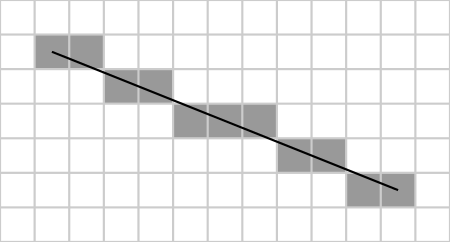

해당, 알고리즘은 아래의 조건에 따라 동작
+ 직선은 항상 왼쪽(평면의 최좌상단이 (0,0) 의 좌표를 가리킴)의 좌표에서 오른쪽 좌표로 그려짐
+ 모든 직선의 기울기가 항상 0 초과 1 이하임을 가정 (따라서, $x_i$ 에서, $x_{i+1}$ 로 좌표를 이동시킬 때, 항상 $x$ 좌표는 1 증가시켜야 함)

#### 알고리즘의 동작
1. 시점 ($x_0$,$y_0$) 와, 종점 ($x_{last}$,$y_{last}$)이 주어졌다고 가정.
   * 단, $x_0$,$y_0$,$x_{last}$,$y_{last}$ $\geq$ 0 (모든 점은 좌표 평면의 1사분면 상 존재)
   * 단, $x_0$ $\leq$ $x_{last}$ (시점이 종점보다 왼쪽에 존재)
   * 단, 0 < $\frac{dy}{dx}$ = $\frac{y_{last} - y_0}{x_{last} - x_0}$ $\leq$ 1 
 <br><br>
2. 시점과 종점을 지나는 직선의 방정식을 유도
   * $y - y_0 = \frac{dy}{dx}(x-x_0)$
   * $y = \frac{dy}{dx}(x-x_0) + y_0$
   * $\therefore$, 어떤 점, $P_i = (x_i,y_i)$ 의 점이 직선보다 아래에 있는지를 판단하기 위해서는, 다음과 같은 판별식을 사용하여, 해당 판별식 값이 0 을 기준으로 큰지, 작은지를 판단<br>$\frac{dy}{dx}(x_i-x_0) + y_0 - y_i > 0$ : 점, $P_i = (x_i,x_i)$ 가 직선보다 아래에 있음<br>$\frac{dy}{dx}(x_i-x_0) + y_0 - y_i = 0$ : 점, $P_i = (x_i,y_i)$ 가 직선 위에 있음<br>$\frac{dy}{dx}(x_i-x_0) + y_0 - y_i < 0$ : 점, $P_i = (x_i,y_i)$ 가 직선 보다 위에 있음
   <br><br>
3. $\frac{dy}{dx}(x-x_0) + y_0 - y$ 의 식을 정리
   * 식에 dx 를 곱함. 이로써,<br> $dy(x-x_0) + dx*y_0 - dx*y$
   * 이후, 식에 2 를 곱합. 이로써,<br> $F = 2*dy(x-x_0) + 2*dx*y_0 - 2*dx*y$ 의 판별식 완성
<br><br>
4. 시점에서부터 시작하여, 2 개의 점 (시점 $P_0 =(x_0,y_0) 일때, (x_0+1,y_0), (x_0+1,y_0+1)$) 중 실제 직선과 가장 근사한 점을 선택
   * 이때, 근사한 점을 선택하는 기준이 되는 종단점을 다음과 같이 정의<br>$M_i(i=1,2,3...)$ = $i$번째 종단점 = ($x_{i-1} + 1$,$y_{i-1} + 0.5$)  $\;$(여기서, $x_{i-1}$,$y_{i-1}$ 은, 가장 최근에 선택된, 직선과 가장 근사한 점)
   <br><br>
   * 종단점(가령, $M_1 = (x_0 + 1, y_0 + 0.5)$)을 판별식 $F$ 에 대입하여, 0을 기준으로, 아래와 같이, 근사점 선택<br> $F(M_1) = 2*dy((x_0+1)-x_0) + 2*dx*y_0 - 2*dx*(y_0 + 0.5)$ $= 2dy - dx$
   
   $\left\{
\begin{array}{ll}
      \ if(F(M_1) \leq 0) : P_i = (x_0 + 1, y_0), M_2 = (x_0 + 2, y_0 + 0.5)\\
      \ if(F(M_1) > 0) : P_i = (x_0 + 1, y_0 + 1), M_2 = (x_0 + 2, y_0 + 1.5)\\
\end{array} 
\right.$
   * 여기서, $M_2 = (x_0 + 2, y_0 + 0.5)$ 인 경우, 판별식 $F$ 의 값은 다음과 같이 유도<br>
   $F(M_2) = 2dy((x_0+2)-x_0) + 2dx*y_0 - 2dx(y_0 + 0.5) = 4dy + - dx$ 이고, 이는, $F(M_1) + 2dy$
   * 혹은, $M_2 = (x_0 + 2, y_0 + 1.5)$ 인 경우, 판별식 $F$ 의 값은 다음과 같이 유도<br>
   $F(M_2) = 2dy((x_0+2)-x_0) + 2dx*y_0 - 2dx(y_0 + 1.5) = 4dy + - 3dx$ 이고, 이는, $F(M_1) + 2(dy-dx)$
   <br><br>
   * $\therefore$,전체적으로 다음과 같이 정의<br>
   $$\left\{
\begin{array}{ll}
      \ if(F(M_{i}) \leq 0) : P_i = (x_{i-1} + 1, y_{i-1}), F(M_{i+1}) = F(M_i) + 2dy\\
      \ if(F(M_1) > 0) : P_i = (x_{i-1} + 1, y_{i-1}+1), F(M_{i+1}) = F(M_i) + 2(dy-dx)\\
\end{array} 
\right.$$
   

#### 브레젠헴 직선 알고리즘을 직접 함수로 정의해봅시다.

In [154]:
import numpy as np

def draw_line(start, end):    
    id_trans = False
    y_trans = False
    dx, dy = end - start
    
    if abs(dx)<abs(dy):
        start = start[::-1]
        end = end[::-1]
        id_trans = True    
        
    if dx*dy < 0 :                          # 기울기 음수인 경우, y 축 대칭 이동
        start[0] *= -1
        end[0] *= -1
        y_trans = True
    
    if start[0] > end [0]:                   # x 좌표가 더 왼쪽인 점이 start 가 되도록 함.
        start, end = end, start   
    
    pixels = bresenham_line(start,end)
    
    if y_trans:
        pixels[:,0] = pixels[:,0]*-1        
    if id_trans:
        pixels = pixels[:,::-1]
        
    return pixels[pixels[:,0].argsort()]

def bresenham_line(start, end):
    pixels = np.append(np.array([]),start)   # 선택될 Pixel 들을 저장
    dx, dy = np.array(end) - np.array(start) # dx, dy 를 구함              
    p_cur = np.array(start)                  # P_current = P0
    f = 2*dy-dx                              # f = F(M_current) = F(M0)
    
    while not np.array_equal(p_cur,end):
        if f <= 0 :
            p_cur[0] = p_cur[0]+ 1
            f = f + 2*dy
        else:
            p_cur = p_cur+1
            f = f + 2*(dy -dx)
            
        pixels = np.append(pixels, p_cur)
    
    return pixels.reshape(-1,2)

In [172]:
print(f'{draw_line(np.array([1,5]),np.array([3,1]))}\n')     # 시점이 (1,5), 종점이 (3,1) 인 경우! 
print(f'{draw_line(np.array([1,10]),np.array([3,1]))}\n')
print(f'{draw_line(np.array([2,4]),np.array([7,9]))}\n')

[[1. 5.]
 [1. 4.]
 [2. 3.]
 [2. 2.]
 [3. 1.]]

[[ 1. 10.]
 [ 1.  9.]
 [ 1.  8.]
 [ 2.  7.]
 [ 2.  6.]
 [ 2.  5.]
 [ 2.  4.]
 [ 3.  3.]
 [ 3.  2.]
 [ 3.  1.]]

[[2. 4.]
 [3. 5.]
 [4. 6.]
 [5. 7.]
 [6. 8.]
 [7. 9.]]



### 사각형을 그려봅시다.

In [156]:
img = cv2.imread('img/blank_500.jpg')

In [157]:
cv2.rectangle(img,(50,50),(150,150),(255,0,0))
cv2.rectangle(img,(300,300),(100,100),(0,255,0),10)
cv2.rectangle(img,(450,200),(200,450),(0,0,255),-1)

# cv2.line => img : 직사각형이 그려질 Frame(Image)
#          => start : 직사각형의 꼭짓점 A(좌측상단이 (0,0), 가로 방향이 x 의 양의 방향, 세로 방향이 y 의 양의 방향)
#          => end : 직사각형의 꼭짓점 B
#          => color : 모서리 및 사각형의 색깔로 각각 (B,G,R)
#          => width : 모서리의 두께를 의미 (-1 을 주는 경우, 사각형의 내부면까지 채우게 됨)

# cv2.rectangle 의 경우, 보통, 그리고자하는 직사각형의 대각선상의 두 점을 바탕으로, Width, Height 를 계산. 
# 따라서, 한 모서리의 양 끝점을 주는 경우, 직선을 그리는 것과 완전히 동일함
cv2.rectangle(img,(450,50),(450,150),(0,0,0),5)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [158]:
cv2.imshow('rectangle',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Polygon 을 그려봅시다.

In [159]:
img = cv2.imread('img/blank_500.jpg')       # 그림판 초기화

In [160]:
pts1 = np.array([[50,50],[150,150],[100,140],[200,240]], dtype=np.int32) # 다각형의 4개 점을 Matrix 형태로 제공
pts2 = np.array([[350,50],[250,200],[450,200]], dtype=np.int32)          # 다각형의 3개 점을 Matrix 형태로 제공
pts3 = np.array([[150,300],[50,450],[250,450]], dtype=np.int32)
pts4 = np.array([[350,250],[450,350],[400,450],[300,450],[250,350]], dtype=np.int32) # 다각형의 5개 점을 Matrix 형태로 제공

In [161]:
cv2.polylines(img,[pts1],False,(255,0,0))          # 4 개의 점으로 이뤄진 열린 다각형 (번개모양)
cv2.polylines(img,[pts2],False,(0,0,0),10)         # 3 개의 점으로 이뤄진 열린 다각형
cv2.polylines(img,[pts3],True,(0,0,255),10)        # 삼각형
cv2.polylines(img,[pts4],True,(0,0,0))             # 오각형

# cv2.polylines
# => image : Polygon 이 그려질 Image
# => pts : Polygon 을 구성하는 좌표들의 array
# => isClosed : True 는 닫힌 도형(종점과 시작점이 이어짐), False 는 열린 도형
# => color
# => width

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [162]:
cv2.imshow('polyline',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 원을 그려봅시다.

In [163]:
img = cv2.imread('img/blank_500.jpg')

In [164]:
## 반지름이 일정한 완전한 원을 그려봅시다.
cv2.circle(img, (120,120),80,(255,0,0))          # 원점 (150,150) 이고, 반지름 길이 100
cv2.circle(img, (300,120),50,(0,0,255),-1)        # 원점 (400,150) 이고, 반지름 길이 50

## 원의 호의 일부분만을 그려봅시다.
cv2.ellipse(img,(70,300),(50,50),0,0,360,(0,0,255)) # 원점 (50,300) 이고, 반지름 길이 50인 원의, 0 도에서부터 360도까지의 호
                                                    #  => 이는, 원의 생략되는 호 없이 완전한 하나의 원을 그리겠다는 것과 같음
cv2.ellipse(img,(180,300),(50,50),0,0,180,(255,0,0))  # 원점 (150,300) 이고, 반지름 길이 50인 원의, 0도에서부터 180도에 해당하는 호만큼만!
                                                      
## 타원을 그려봅시다.
cv2.ellipse(img,(60,470),(50,75),15,0,360,(0,0,0))    # 원점이 (60,470) 인, 가로 반지름의 길이(50), 세로 반지름의 길이(75) 인 타원을 시계방향으로 15도 회전
cv2.ellipse(img,(200,470),(75,50),0,0,360,(0,255,0))  # 원점이 (200,470) 인, 가로 반지름의 길이(75), 세로 반지름의 길이(50) 인 타원
cv2.ellipse(img,(350,470),(50,75),0,0,360,(255,0,255)) # 원점이 (350,470) 인, 가로 반지름의 길이(50), 세로 반지름의 길이(75)인 타원

## cv2.ellipse
## => image
## => rotatedRect : 타원/호/원의 중심
## => radius : 반경 (가로 반경, 세로 반경)
## => angle : 해당 원형을 시계방향으로 얼마만큼 회전시킬 것인가
## => start : (start ~ end) 각도에 해당하는 호의 부분만 그려짐. 이때 start 는 해당 호의 시점에서의 각도 
## => end : (start ~ end) 각도에 해당하는 호의 부분만 그려짐. 이때 end 는 해당 호의 종점에서의 각도
## => color

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [165]:
cv2.imshow('circle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 텍스트를 그려봅시다.

In [192]:
img = cv2.imread('img/blank_500.jpg')

In [193]:
## cv2.putText
## => Image
## => text : 표현될 문자열
## => point : 텍스트의 좌표 (텍스트 란의 좌측 하단 기준)
## => font : 텍스트 폰트(글꼴)
##    -> cv2.FONT_ITALIC, cv2.FONT_HERSHEY_PLAIN
## => font_size : 텍스트 크기
## => color

## cv2.FONT_HERSHEY_PLAIN
cv2.putText(img, "Plain", (30,30),cv2.FONT_HERSHEY_PLAIN,1,(0,0,0))

## cv2.FONT_HERSHEY_DUPLEX
cv2.putText(img,"Duplex",(50,70),cv2.FONT_HERSHEY_DUPLEX,1,(0,0,0))

## cv2.FONT_HERSHEY_PLAIN + cv2.FONT_ITALIC
cv2.putText(img,"Plain Italic",(50,230),cv2.FONT_HERSHEY_PLAIN | cv2.FONT_ITALIC,1,(0,0,0))

## cv2.FONT_HERSHEY_COMPLEX + cv2.FONT_ITALIC
cv2.putText(img,"Complex Italic",(50,270),cv2.FONT_HERSHEY_COMPLEX | cv2.FONT_ITALIC,1,(0,0,0))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [194]:
cv2.imshow('text',img)
cv2.waitKey(0)
cv2.destroyAllWindows()